In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

In [ ]:
ds = pd.read_csv('Language_Detection.csv')
ds.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [ ]:
ds['Language'].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10337 non-null  object
 1   Language  10337 non-null  object
dtypes: object(2)
memory usage: 161.6+ KB


In [ ]:
ds.isnull().sum()

Text        0
Language    0
dtype: int64

In [ ]:
x = ds['Text']
y = ds['Language']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
data_list = []
for text in x :
  text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
  text = re.sub(r'[[]]', ' ', text)
  text = text.lower()
  data_list.append(text)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x = cv.fit_transform(data_list).toarray()
x.shape 

(10337, 34937)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 10 ,criterion = 'gini')
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix , accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[105   0   0   0   0   0   0   0   0  12   0   0   0   0   0   0   0]
 [  0  67   0   1   0   2   0   0   0   2   0   1   0   0   4   0   0]
 [  0   1  94   1   3   0   0   0   0   7   0   0   0   0   0   0   0]
 [  0   0   2 249   0   0   0   0   2   6   0   0   0   1   0   0   0]
 [  0   1   1   1 184   0   0   0   0   3   0   0   0   3   0   0   2]
 [  0   1   0   1   0  96   0   0   1   6   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  63   0   0   7   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  17   0   1   0   0   0   0   0   0   0]
 [  0   0   0   8   6   0   0   0 122   5   0   1   0   9   0   0   1]
 [  0   0   0   0   0   0   0   0   0  77   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   7 107   0   0   0   0   0   0]
 [  0   1   0   3   1   2   0   0   2   1   0 131   0   9   0   0   0]
 [  0   0   0   0   0   0   0   0   0  14   0   0 128   0   0   0   0]
 [  0   0   0   4   3   0   0   0   0   6   0   4   0 139   1   0   1]
 [  0 

In [ ]:

accuracy_score(y_test,y_pred)

0.8999032882011605

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train,y_train)
y_pred2 = nb.predict(x_test)
accuracy_score(y_test,y_pred2)

0.973404255319149

In [ ]:
cm2 = confusion_matrix(y_test,y_pred2)
print(cm2)

[[113   0   0   4   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  73   0   1   1   0   0   0   0   0   0   1   0   0   1   0   0]
 [  0   0 103   3   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 259   0   0   0   0   1   0   0   0   0   0   0   0   0]
 [  0   0   1   0 194   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   1   1 102   0   0   0   0   0   0   0   0   1   0   0]
 [  0   0   0   0   0   0  70   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18   0   0   0   0   0   0   0   0   0]
 [  0   0   1   1   0   0   0   0 144   0   0   2   0   3   1   0   0]
 [  0   0   0   3   0   0   0   0   0  74   0   0   0   0   0   0   0]
 [  0   0   0   3   0   0   0   0   0   0 111   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 148   0   2   0   0   0]
 [  0   0   0   3   1   0   0   0   0   0   0   0 137   1   0   0   0]
 [  0   1   0   2   0   0   0   0   0   0   0   1   0 154   0   0   0]
 [  0 

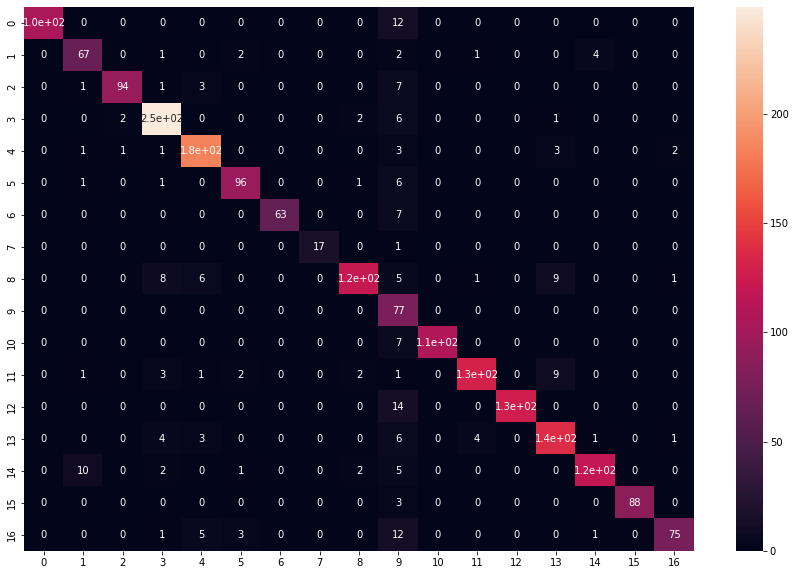

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot= True)
plt.show()

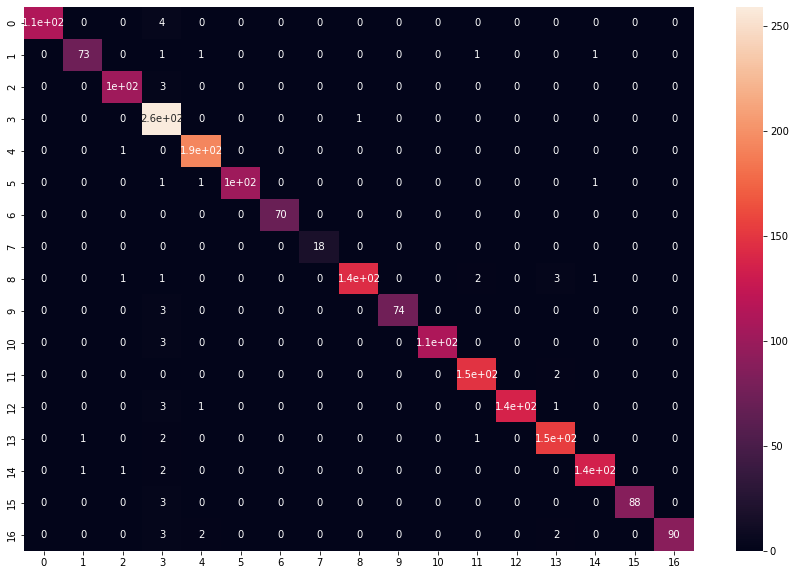

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(cm2,annot= True)
plt.show()

In [ ]:
def text_predict(text):
  x = cv.transform([text]).toarray()
  lang = nb.predict(x)
  lang = le.inverse_transform(lang)
  print('The Language used is',lang[0])

In [ ]:
text = input()
text_predict(text)

ತಾಯಂದಿರು
The Language used is English
